In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import pandas
import geopandas as gp
import statistics
from scipy.spatial import Delaunay
from matplotlib import cm
from matplotlib.tri import Triangulation, LinearTriInterpolator
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from networkx.drawing.nx_pydot import write_dot


N=50
R=100
r=50

pi=math.pi

xf=np.zeros(N)
yf=np.zeros(N)
xyf=np.zeros([N,2])

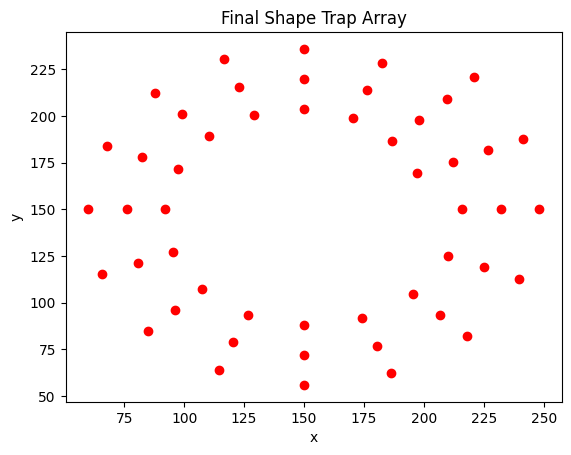

In [2]:
## FINAL SHAPE     

for ii in range(1,N+1):
    ray=(r+(R-r)/N*ii)
    a=150+ray*math.cos(ii*pi/8)
    xf[ii-1]=a
    b=150+ray*math.sin(ii*pi/8)
    yf[ii-1]=b
    xyf[ii-1]=[a,b]


plt.plot(xf,yf, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Shape Trap Array')
#plt.show()
#print(xyf)

M=N+round(math.sqrt(3*N)*2)

xyres=np.ones([M,2]) #reserve trap





In [3]:
## RESERVE    
for ii in range(0,N):
    nn=0
    nc=1
    while nc == 1:
        nc=0
        [A,B]=xyf[ii]   
        res=[A+(5+0.05*nn)*math.cos(nn*pi/8),B+(5+0.05*nn)*math.sin(nn*pi/8)]


        for jj in range(0,N-1): 
            
            if  math.sqrt(sum(np.square(res - xyf[jj])))<10:
                nc=1
               
        for jj in range(0,len(xyres)-1):
            if  math.sqrt(sum(np.square(res - xyres[jj])))<10:
                nc=1
        nn=nn+1 
             
    if 0>res[0] or res[0]>350 or 0>res[1] or res[1]>350:
        nc=1

    if nc==1:
        break
        print('error')

    xyres[ii]=res



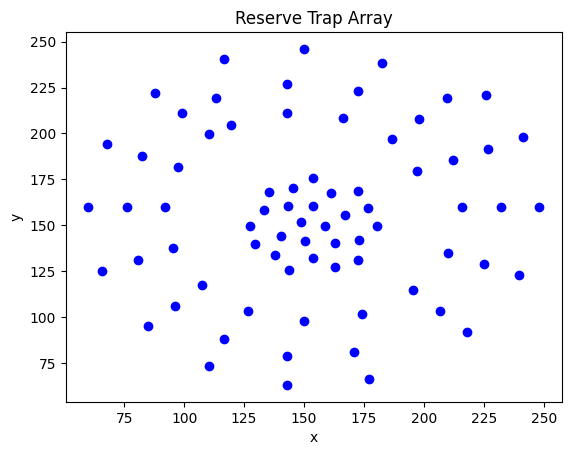

In [4]:

## SURPLUS          
for ii in range(0,round(math.sqrt(3*N)*2)):  
    nn=0
    nc=1
    while nc == 1:
        nc=0
        res=[statistics.mean(xf)+(5+0.05*nn)*math.cos(nn*pi/8),statistics.mean(yf)+(5+0.05*nn)*math.sin(nn*pi/8)]


        for jj in range(0,N-1): 
            
            if  math.sqrt(sum(np.square(res - xyf[jj])))<10:
                nc=1
               
        for jj in range(0,len(xyres)-1):
            if  math.sqrt(sum(np.square(res - xyres[jj])))<10:
                nc=1
        nn=nn+1 
             
    if 0>res[0] or res[0]>350 or 0>res[1] or res[1]>350:
        break
        print('errors for '+ str(res))

    xyres[N+ii]=res


plt.plot(tuple(i[0] for i in xyres),tuple(i[1] for i in xyres), 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reserve Trap Array')
plt.show()


tot traps: 
124


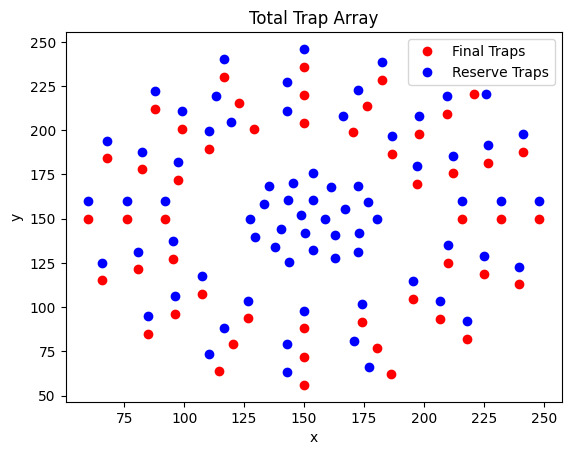

In [5]:
## TOTAL

x=list(tuple(i[0] for i in xyf))+list(tuple(j[0] for j in xyres ));
y=list(tuple(i[1] for i in xyf))+list(tuple(j[1] for j in xyres ));

#print(x[len(x)-2])

xy=np.zeros([N+M,2])

for ii in range(0,N+M):
    A=x[ii]        
    B=y[ii]
    xy[ii]=[A,B]


#print(xy)

print('\ntot traps: \n'+str(len(xy)))


plt.plot(tuple(i[0] for i in xyf),tuple(i[1] for i in xyf), 'ro')
plt.plot(tuple(i[0] for i in xyres),tuple(i[1] for i in xyres), 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Total Trap Array')
plt.legend(['Final Traps', 'Reserve Traps'])
plt.show()

#creare grafo
#triangulation
#cleaned full-connected

In [19]:
## Graph Creation

G = nx.Graph()
G.add_nodes_from(range(1,N+M+1))

## Triangulation

#DT=Delaunay(xy)
#tri=Triangulation(x,y)
#E=tri.edges
#s=E[:,0]
#t=E[:,1]

#for ii in range(0,len(s)):
#   L=math.sqrt((x[s[ii]]-x[t[ii]])**2 + (y[s[ii]]-y[t[ii]])**2)
#   G.add_edge(s[ii],t[ii], length=L)
   


## Clean Full-Connected
#print(G.nodes())
print('number of nodes: ' + str(G.number_of_nodes()))

for ii in range(1,G.number_of_nodes()+1):
    print(ii,'-----------------')
    for jj in range(ii,G.number_of_nodes()+1):
        if ii!=jj:
            L=math.sqrt((x[ii-1]-x[jj-1])**2 + (y[ii-1]-y[jj-1])**2)

            llmin=100

            for kk in range(1,G.number_of_nodes()+1):
                if kk!=ii and kk!=jj:

                    
                    for aa in range(1,round(L)-1):#1 mi-steps along the edge
                    
                        XX=(x[ii-1]+(x[jj-1]-x[ii-1])*aa/L)
                        YY=(y[ii-1]+(y[jj-1]-y[ii-1])*aa/L)
                        ll=math.sqrt((XX-x[kk-1])**2 + (YY-y[kk-1])**2)
                        
                        if ll<llmin:
                            llmin=ll
                
                if llmin<5:
                    print(ii,jj,'no')  
                    break 
                
                
            if llmin>5:    
                G.add_weighted_edges_from([(ii,jj, L)])
                print(ii,jj,'ok')


#G.remove_node(0)
print('number of edges: ' + str(G.number_of_edges()))

#print(G.nodes)


number of nodes:124
1 -----------------
1 2 ok
1 3 no
1 4 ok
1 5 ok
1 6 no
1 7 no
1 8 no
1 9 no
1 10 no
1 11 no
1 12 no
1 13 no
1 14 no
1 15 no
1 16 ok
1 17 ok
1 18 no
1 19 no
1 20 no
1 21 no
1 22 no
1 23 no
1 24 no
1 25 no
1 26 no
1 27 no
1 28 ok
1 29 ok
1 30 no
1 31 no
1 32 no
1 33 no
1 34 no
1 35 no
1 36 no
1 37 no
1 38 no
1 39 no
1 40 no
1 41 no
1 42 no
1 43 no
1 44 no
1 45 no
1 46 no
1 47 no
1 48 no
1 49 no
1 50 no
1 51 ok
1 52 no
1 53 no
1 54 no
1 55 no
1 56 ok
1 57 no
1 58 no
1 59 no
1 60 no
1 61 no
1 62 no
1 63 ok
1 64 ok
1 65 ok
1 66 ok
1 67 ok
1 68 no
1 69 no
1 70 no
1 71 no
1 72 no
1 73 no
1 74 no
1 75 no
1 76 no
1 77 no
1 78 no
1 79 no
1 80 ok
1 81 no
1 82 no
1 83 no
1 84 no
1 85 no
1 86 no
1 87 no
1 88 no
1 89 no
1 90 no
1 91 no
1 92 no
1 93 no
1 94 no
1 95 no
1 96 no
1 97 no
1 98 no
1 99 no
1 100 no
1 101 no
1 102 no
1 103 no
1 104 no
1 105 no
1 106 no
1 107 no
1 108 no
1 109 no
1 110 no
1 111 no
1 112 no
1 113 no
1 114 no
1 115 no
1 116 ok
1 117 no
1 118 no
1 119 no
1 12

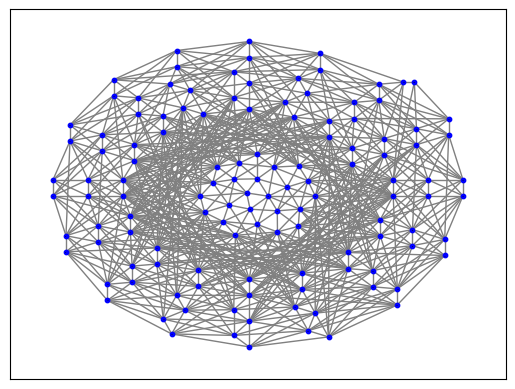

In [20]:
## Plot and Save

pos= {n: (x[n-1], y[n-1]) for n in G}

options = {
    'node_color': 'blue',

    'node_size': 10,

    'width': 1,

    'edge_color': 'gray',

    'font_size': 1
}

nx.draw_networkx(G, pos, **options)
plt.savefig("graph.png")


import json

file = open('/Users/afant/Documents/Dottorato/Programmi/graphdata.json', 'w+')
data = { 'x':x,'y':y, 'pos':pos, 'Nfinal':N}

json.dump(data, file)

nx.write_gml(G, "datagraph.gml")